In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("data/spotifywlyrics.csv")

In [10]:
english = data[data['language']=='en']
english.to_csv("data/english_lyrics.csv")

In [3]:
import lyricsgenius as lg

In [4]:
client = '3EoU324TLPMo1v1t0fuNtAfrqlnZVfRd8_AQbsMLvUnNXRvyqSqg1iesGaCA-Dtc'
secret = '_bUyrzGuG_hqnt_MNKKsoQWdVgooMoc3riCqh5QX_KuzV-OfAq6XoGQQ5kcGGA0fxobTifVlD0Hm-Lm4gZu2KQ'
access = 'aMNdATGZum7Ls9DVe15GT0vsaKZUOaYHjXB-4Ix2ZRdeR2nBWWwOX_AuljHZ-Nk2'

In [5]:
tracks = pd.read_csv("data/data.csv")
genres = pd.read_csv('data/data_w_genres.csv')
top10 = pd.read_csv('data/top10s.csv', encoding = 'ISO-8859-1')
lyrics = pd.read_csv('data/spotifywlyrics.csv')

In [6]:
english_lyrics = lyrics.loc[lyrics['language'] == 'en']

In [11]:
final = pd.read_csv("data/all_features_dataset.csv")

In [8]:
english_lyrics.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [9]:
from textblob import TextBlob

In [11]:
## Using TextBlob to get the lyrical polarity and subjectivity of the lyrics
from textblob import TextBlob
lyrics_list = english_lyrics.lyrics.to_list()
subj = []
pol = []
for lyric in lyrics_list:
    song = TextBlob(lyric)
    subj.append(song.sentiment.subjectivity)
    pol.append(song.sentiment.polarity)
english_lyrics['lyrical_subjectivity'] = subj
english_lyrics['lyrical_polarity'] = pol

In [12]:
# english_lyrics['lyrical_subjectivity'] = subj
# english_lyrics['lyrical_polarity'] = pol

In [13]:
# track_name_list = english_lyrics.track_name.to_list()
# subjTrack = []
# polTrack = []
# for trackname in track_name_list:
#     name = TextBlob(trackname)
#     subjTrack.append(name.sentiment.subjectivity)
#     polTrack.append(name.sentiment.polarity)

In [14]:
# english_lyrics['track_name_subjectivity'] = subjTrack
# english_lyrics['track_name_polarity'] = polTrack

In [15]:
# english_lyrics.to_csv("data/tracks_w_nlp_en.csv")

In [22]:
to_senti = pd.read_csv("data/all_features_dataset.csv", index_col = 0)

In [33]:
import collections

In [48]:
# Making all potential Trigrams and getting the count of trigrams in each song
import collections
phrase_count = []
for song in lyrics_list:
    words = song.lower().split()
    phrases = collections.defaultdict(int)
    for one, two, three in zip(words[:-3], words[1:-2], words[2:]):
        phrases[(one, two, three)] += 1
        counts = [lyric for lyric, count in phrases.items() if count > 10]
    phrase_count.append(len(counts))

In [51]:
english_lyrics['repeated_phrases'] = phrase_count

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
# Using Lyrics Genius to Retrieve the Lyrics of Songs
import lyricsgenius as lg
access = 'aMNdATGZum7Ls9DVe15GT0vsaKZUOaYHjXB-4Ix2ZRdeR2nBWWwOX_AuljHZ-Nk2'
genius = lg.Genius(access)
artist_song = tracks[['primary_artist', 'name']]
artist_song = list(artist_song.to_records(index=False))

def get_lyrics(arr):
    c = 0
    all_songs = []
    for name, song in arr:
        try:
            artist = genius.search_artist(name, max_songs = 1)
            song = artist.song(song)
#             songs = (genius.search_artist(name, max_songs=k)).songs
            s = song.lyrics
            all_songs.append(s)
            c += 1
            print(f"Songs grabbed:{len(s)}")
        except:
            print(f"some exception at {name}: {c}")
            all_songs.append('no lyrics found')
    return all_songs
lyrics = get_lyrics(artist_song)

In [55]:
lyrics = get_lyrics(artist_song)

#### Only run if you need to detect song language

In [7]:
# # Detect the Language of the song using langdetect
# from langdetect import detect
# import re

# def try_detect(cell):
#     try:
#         detected_lang = detect(cell)
#     except:
#         detected_lang = None
#     return detected_lang

# # this took a very long time
# tracks['lang'] = tracks.name.apply(try_detect)

### Preliminary Data Exploration

In [10]:
features = tracks[['acousticness','danceability','duration_ms',
                   'energy', 'explicit', 'instrumentalness','key','liveness','loudness',
                  'mode', 'speechiness','tempo', 'valence']]

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 288x288 with 0 Axes>

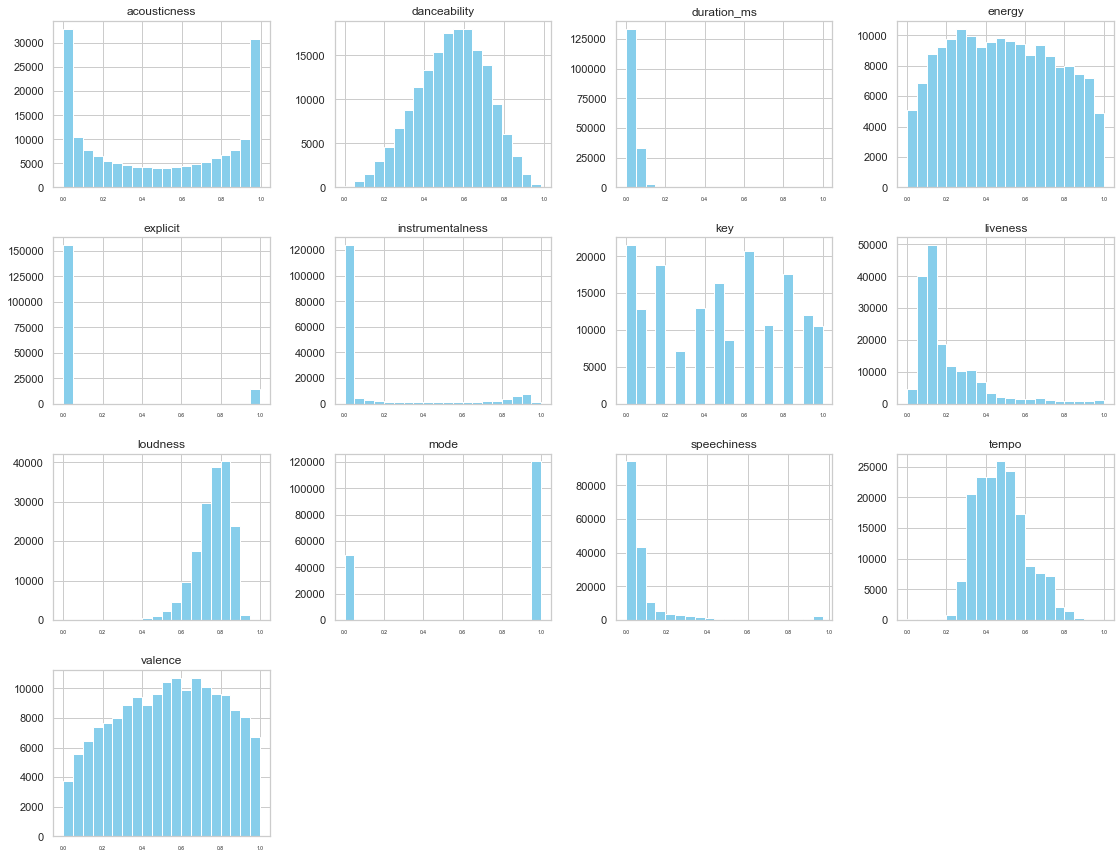

In [28]:
plt.rcParams["figure.figsize"] = [19,15]
plt.figure(figsize=(4,4))
features.hist(xlabelsize = 5, bins = 20, color = "skyblue")

Text(0.5, 0, 'Year')

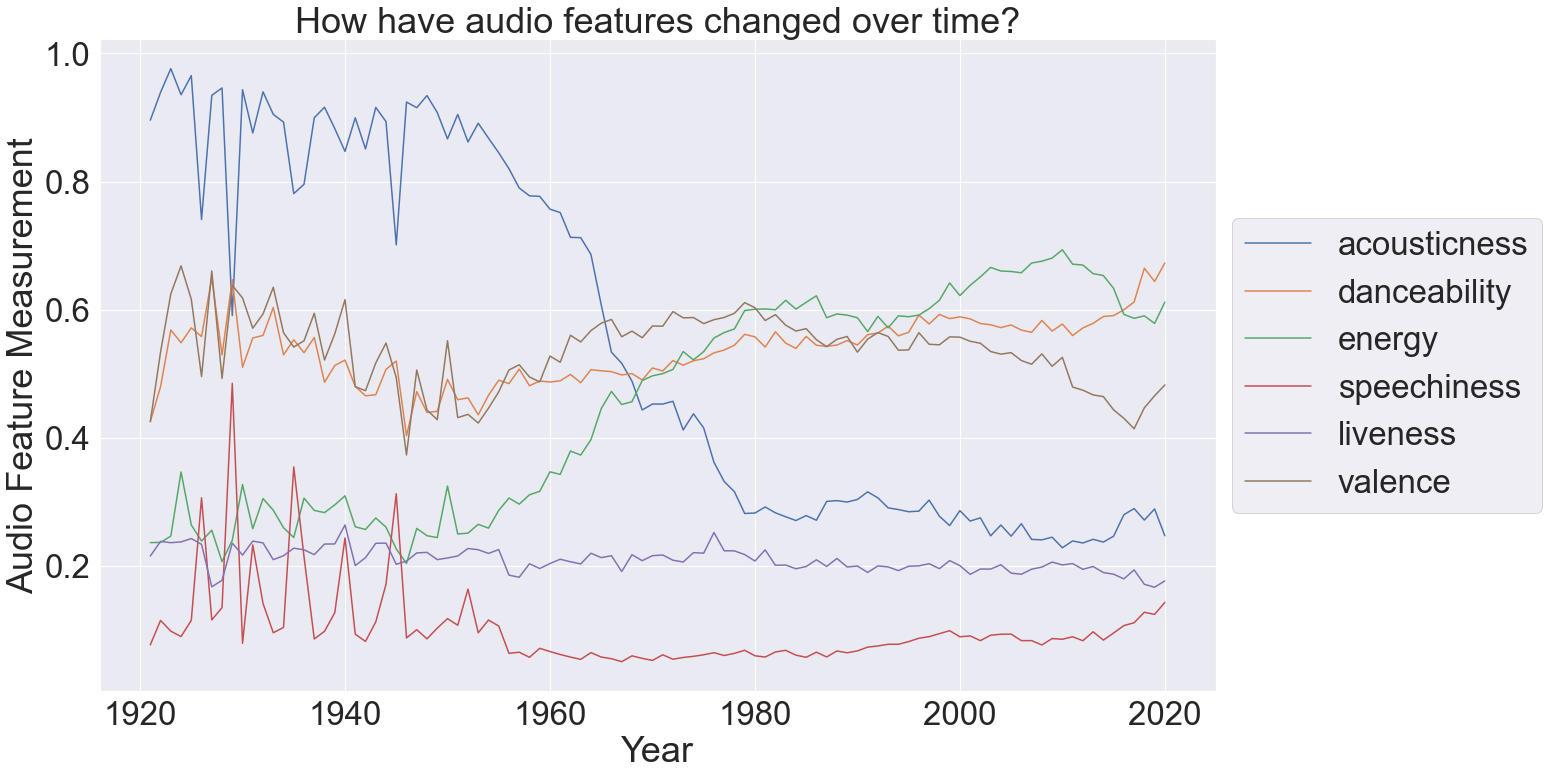

In [16]:
tracks = pd.read_csv("data/data.csv")
plt.figure(figsize=(20, 12))
sns.set(style="darkgrid", font_scale = 3)
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('How have audio features changed over time?')
ax.set_ylabel('Audio Feature Measurement')
ax.set_xlabel('Year')

<AxesSubplot:>

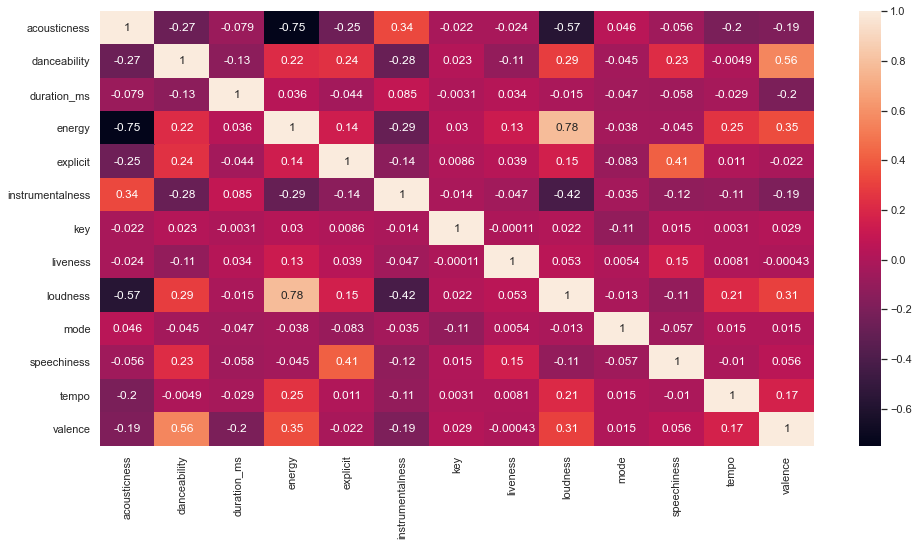

In [13]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = features.corr()
sns.heatmap(corr,annot=True)

### Getting Billboard Songs Spotify Features

In [24]:
import pandas as pd

In [25]:
tophits= pd.read_csv("data/tsort_data.csv")

In [27]:
artists = tophits['artist'].to_list()
songs = tophits['songName'].to_list()

In [2]:
import pandas as pd 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import configparser

In [3]:
# use your cfg file with your own API keys here
config = configparser.ConfigParser()
config.read('/Users/kunal/Projects/spotify/config.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')


In [4]:
# Establish Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [75]:
# retrieve the IDs for each song from Billboard
ids = []
for i in range(len(artists)):
    artist_name = artists[i]
    track_name = songs[i]
    track_id = sp.search(q='artist:' + artist_name + ' track:' + track_name, type='track', limit =1)
    ids.append(track_id)

In [94]:
# parse the spotify API response (JSON/dict format)
uri = []
for i in range(8887):
    try:
        val = ids[i]['tracks']['items'][0]['uri'][14:]
        uri.append(val)
    except:
        uri.append("nf")

In [72]:
track_id = sp.search(q='artist:' + artist_name + ' track:' + track_name, type='track', limit =1)

In [99]:
with open('data/uris.txt', "w") as f:
    for item in uri:
        f.write('%s\n' % item)

In [7]:
with open("data/uris.txt") as f:
    content = f.readlines()

In [11]:
uris = [x.strip() for x in content]

In [13]:
uri_clean = list(filter(('nf').__ne__, uris))

In [15]:
def getTrackFeatures(uri):
    meta = sp.track(uri)
    features = sp.audio_features(uri)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [22]:
import time
# loop over track ids 
tracks = []
for i in range(len(uri_clean)):
    try:
        time.sleep(.5)
        track = getTrackFeatures(uri_clean[i])
        tracks.append(track)
    except:
        tracks.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
        continue

In [23]:
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("data/bill_spotify.csv", sep = ',')

In [160]:
billboard_data = pd.read_csv("data/bill_spotify.csv", index_col = 0)
billboard_data = billboard_data.drop_duplicates(subset = ['name'])

In [161]:
bill_lyrics = pd.read_csv("data/lyricsfromJSON.csv", index_col = 0)

In [162]:
bill_lyrics.columns

Index(['lyrics', 'tags', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_words', 'num_lines', 'sentiment', 'title',
       'f_k_grade', 'artist', 'difficult_words', 'num_dupes'],
      dtype='object')

In [163]:
billboard_data.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

In [164]:
bill_lyrics['artist'] = bill_lyrics['artist'].str.lower()
bill_lyrics['title'] = bill_lyrics['title'].str.lower()

In [165]:
billboard_data['artist'] = billboard_data['artist'].str.lower()
billboard_data['title'] = billboard_data['name'].str.lower()

In [166]:
billboard_data['title'] = billboard_data['title'].str.split(" - ").str[0]

In [167]:
billboard_data['title'] = billboard_data['title'].str.rsplit(" ( ").str[0]

In [168]:
billboard_data.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,title
0,Let It Be - Remastered 2009,Let It Be (Remastered),the beatles,1970-05-08,243026,78,0.443,0.631,0.443,0.403,0.000000,0.1110,-8.339,0.0322,143.462,4,let it be
1,In the Summertime,In the Summertime,mungo jerry,1970-01-01,211880,67,0.754,0.724,0.754,0.449,0.000000,0.1620,-14.013,0.0615,82.751,4,in the summertime
2,Venus,At Home,shocking blue,1969,187533,66,0.691,0.462,0.691,0.762,0.028600,0.0804,-6.470,0.0367,128.111,4,venus
3,Bridge Over Troubled Water,Bridge Over Troubled Water,simon & garfunkel,1970-01-26,293120,72,0.149,0.822,0.149,0.206,0.000649,0.1150,-13.888,0.0323,79.764,4,bridge over troubled water
4,Raindrops Keep Falling on My Head - Rerecorded,Golden Legends: B.J. Thomas (Rerecorded),b.j. thomas,2005-01-01,178493,44,0.507,0.869,0.507,0.494,0.019400,0.1990,-8.224,0.0629,105.591,4,raindrops keep falling on my head


In [169]:
lyricsFeatures = billboard_data.merge(bill_lyrics, on=['artist', 'title'])

In [170]:
lyricsFeatures.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,...,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,f_k_grade,difficult_words,num_dupes
0,In the Summertime,In the Summertime,mungo jerry,1970-01-01,211880,67,0.754,0.7240,0.754,0.449,...,53,1970,4.8,98.21,382,50,"{'neg': 0.029, 'neu': 0.779, 'pos': 0.191, 'co...",1.3,20,30
1,Venus,At Home,shocking blue,1969,187533,66,0.691,0.4620,0.691,0.762,...,33,1970,3.6,101.26,130,32,"{'neg': 0.134, 'neu': 0.584, 'pos': 0.28200000...",0.1,10,22
2,Spirit In The Sky,Spirit In The Sky,norman greenbaum,1969-01-01,242893,74,0.609,0.0994,0.609,0.617,...,22,1970,5.2,105.66,228,26,"{'neg': 0.145, 'neu': 0.6970000000000001, 'pos...",0.5,11,7
3,Yellow River,Christie,christie,1970,165960,51,0.627,0.0859,0.627,0.544,...,83,1970,4.4,99.23,223,32,"{'neg': 0.098, 'neu': 0.784, 'pos': 0.11800000...",0.9,11,20
4,(They Long To Be) Close To You,Close To You,carpenters,1970,276000,61,0.533,0.7070,0.533,0.245,...,2,1970,4.0,100.24,203,35,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.5,12,28


In [171]:
len(lyricsFeatures)

1419

In [172]:
lyricsFeatures.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'title', 'lyrics', 'tags', 'num_syllables', 'pos',
       'year', 'fog_index', 'flesch_index', 'num_words', 'num_lines',
       'sentiment', 'f_k_grade', 'difficult_words', 'num_dupes'],
      dtype='object')

In [173]:
lf = lyricsFeatures[['album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'title', 'lyrics','year']]

In [174]:
## Using TextBlob to get the lyrical polarity and subjectivity of the lyrics
from textblob import TextBlob
lyrics_list = lf.lyrics.to_list()
subj = []
pol = []
for lyric in lyrics_list:
    song = TextBlob(lyric)
    subj.append(song.sentiment.subjectivity)
    pol.append(song.sentiment.polarity)
lf['lyrical_subjectivity'] = subj
lf['lyrical_polarity'] = pol

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [175]:
# Making all potential Trigrams and getting the count of trigrams in each song
import collections
phrase_count = []
for song in lyrics_list:
    words = song.lower().split()
    phrases = collections.defaultdict(int)
    for one, two, three in zip(words[:-3], words[1:-2], words[2:]):
        phrases[(one, two, three)] += 1
        counts = [lyric for lyric, count in phrases.items() if count > 10]
    phrase_count.append(len(counts))
lf['repeated_phrases'] = phrase_count

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [176]:
# lf['minutes'] = lf['length'] / 60000
# lf['word_count'] = lf['lyrics'].str.rsplit(" ").apply(len)
# lf['WPM_approx'] = lf['word_count'] / lf['minutes']
# del lf['length']

In [149]:
# save out this DF
# lf.to_csv("data/hits_wfeatures.csv")

In [178]:
# lf.columns
lf['duration_ms'] = lf['length']
del lf['length']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
old_15k = pd.read_csv("data/english_lyrics.csv", index_col = 0)

In [182]:
old_15k.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [184]:
old_15k['title'] = old_15k['track_name'].str.lower().str.split(" - ").str[0]

In [186]:
old_15k['title'] = old_15k['title'].str.lower().str.rsplit(" ( ").str[0]

In [187]:
old_15k['artist'] = old_15k['track_artist'].str.lower()

In [188]:
old_15k['year'] = old_15k['track_album_release_date'].str.rsplit("-").str[0]

In [180]:
lf.columns

Index(['album', 'artist', 'release_date', 'popularity', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'title', 'lyrics', 'year',
       'lyrical_subjectivity', 'lyrical_polarity', 'repeated_phrases',
       'duration_ms'],
      dtype='object')

In [196]:
old_songs = old_15k[['title', 'artist', 'lyrics', 'track_popularity',
        'track_album_name', 'year', 'track_album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

In [199]:
from textblob import TextBlob
lyrics_list = old_songs.lyrics.to_list()
subj = []
pol = []
for lyric in lyrics_list:
    song = TextBlob(lyric)
    subj.append(song.sentiment.subjectivity)
    pol.append(song.sentiment.polarity)
old_songs['lyrical_subjectivity'] = subj
old_songs['lyrical_polarity'] = pol

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [200]:
# Making all potential Trigrams and getting the count of trigrams in each song
import collections
phrase_count = []
for song in lyrics_list:
    words = song.lower().split()
    phrases = collections.defaultdict(int)
    for one, two, three in zip(words[:-3], words[1:-2], words[2:]):
        phrases[(one, two, three)] += 1
        counts = [lyric for lyric, count in phrases.items() if count > 10]
    phrase_count.append(len(counts))
old_songs['repeated_phrases'] = phrase_count

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [201]:
lf.columns

Index(['album', 'artist', 'release_date', 'popularity', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'title', 'lyrics', 'year',
       'lyrical_subjectivity', 'lyrical_polarity', 'repeated_phrases',
       'duration_ms'],
      dtype='object')

In [202]:
old_songs.columns

Index(['title', 'artist', 'lyrics', 'track_popularity', 'track_album_name',
       'year', 'track_album_release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'lyrical_subjectivity',
       'lyrical_polarity', 'repeated_phrases'],
      dtype='object')

In [203]:
lf.head()

,album,artist,release_date,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,title,lyrics,year,lyrical_subjectivity,lyrical_polarity,repeated_phrases,duration_ms
0,In the Summertime,mungo jerry,1970-01-01,67,0.754,0.7240,0.449,0.000000,0.1620,-14.013,0.0615,82.751,4,in the summertime,In the summertime when the weather is high\nYo...,1970,0.624263,0.317571,0,211880
1,At Home,shocking blue,1969,66,0.691,0.4620,0.762,0.028600,0.0804,-6.470,0.0367,128.111,4,venus,A goddess on a mountain top\nWas burning like ...,1970,0.586667,0.011667,0,187533
2,Spirit In The Sky,norman greenbaum,1969-01-01,74,0.609,0.0994,0.617,0.004040,0.1180,-7.091,0.0307,128.903,4,spirit in the sky,When I die and they lay me to rest\nGonna go t...,1970,0.298148,0.807407,0,242893
3,Christie,christie,1970,51,0.627,0.0859,0.544,0.000000,0.1520,-11.436,0.0290,129.851,4,yellow river,"So long, boy, you can take my place\nI got my ...",1970,0.212222,0.092079,0,165960
4,Close To You,carpenters,1970,61,0.533,0.7070,0.245,0.000042,0.1220,-14.652,0.0326,89.328,4,(they long to be) close to you,Why do birds suddenly appear\nEverytime you ar...,1970,0.390741,0.032870,1,276000


In [204]:
old_songs.head()

,title,artist,lyrics,track_popularity,track_album_name,year,track_album_release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrical_subjectivity,lyrical_polarity,repeated_phrases
1,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017,2017-11-21,0.303,0.880,9,...,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,0.388542,0.214583,0
2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005,2005-01-01,0.845,0.652,6,...,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,0.460365,0.150858,0
3,baby it's cold outside (feat. christina aguilera),ceelo green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012,2012-10-29,0.425,0.378,5,...,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,0.611454,0.113423,0
4,dumb litty,kard,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019,2019-09-22,0.760,0.887,9,...,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,0.570486,-0.442188,2
5,soldier,james tw,"Hold your breath, don't look down, keep trying...",70,Chapters,2019,2019-04-26,0.496,0.639,6,...,0.0550,0.28000,0.00000,0.0975,0.305,147.764,224720,0.609292,0.232474,0


In [205]:
old_songs = old_songs.rename(columns={'track_popularity': 'popularity', 'track_album_name': 'album',
                                     'track_album_release_date':'release_date'})

In [210]:
# del lf['time_signature']
# del old_songs['key']

In [211]:
old_songs.columns

Index(['title', 'artist', 'lyrics', 'popularity', 'album', 'year',
       'release_date', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'lyrical_subjectivity',
       'lyrical_polarity', 'repeated_phrases'],
      dtype='object')

In [209]:
lf.columns

Index(['album', 'artist', 'release_date', 'popularity', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'title', 'lyrics', 'year',
       'lyrical_subjectivity', 'lyrical_polarity', 'repeated_phrases',
       'duration_ms'],
      dtype='object')

In [222]:
full = old_songs.merge(lf, on = ['artist', 'title'], how = 'outer')

In [223]:
len(full)

16243

In [224]:
full.head()

,title,artist,lyrics_x,popularity_x,album_x,year_x,release_date_x,danceability_x,energy_x,loudness_x,...,liveness_y,loudness_y,speechiness_y,tempo_y,lyrics_y,year_y,lyrical_subjectivity_y,lyrical_polarity_y,repeated_phrases_y,duration_ms_y
0,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28.0,Love & Loss,2017,2017-11-21,0.303,0.880,-4.739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0.0,Gold,2005,2005-01-01,0.845,0.652,-7.504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",36.0,RnB 1990's,2019,2019-07-19,0.840,0.560,-10.530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0.0,Bell Biv DeVoe Greatest Hits (Remastered),2000,2000,0.836,0.613,-9.376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",48.0,20th Century Masters: The Millennium Collectio...,2002,2002-01-01,0.841,0.701,-6.365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
len(full)

16243

In [226]:
full.drop_duplicates()

,title,artist,lyrics_x,popularity_x,album_x,year_x,release_date_x,danceability_x,energy_x,loudness_x,...,liveness_y,loudness_y,speechiness_y,tempo_y,lyrics_y,year_y,lyrical_subjectivity_y,lyrical_polarity_y,repeated_phrases_y,duration_ms_y
0,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28.0,Love & Loss,2017,2017-11-21,0.303,0.880,-4.739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0.0,Gold,2005,2005-01-01,0.845,0.652,-7.504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",36.0,RnB 1990's,2019,2019-07-19,0.840,0.560,-10.530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0.0,Bell Biv DeVoe Greatest Hits (Remastered),2000,2000,0.836,0.613,-9.376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",48.0,20th Century Masters: The Millennium Collectio...,2002,2002-01-01,0.841,0.701,-6.365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,girl crush,little big town,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1120,-10.220,0.0302,173.788,"I've got a girl crush\nHate to admit it but,\n...",2015.0,0.524074,-0.106296,0.0,193320.0
16239,i don't f**k with you,big sean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3340,-5.658,0.0712,97.957,Big Sean\nI don't fuck with you\nYou little st...,2015.0,0.584821,-0.185853,4.0,284413.0
16240,"honey, i'm good.",andy grammer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3510,-7.289,0.0546,122.014,"Nah nah honey, I’m good\nI could have another ...",2015.0,0.626754,0.356579,0.0,199263.0
16241,only,nicki minaj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0969,-7.245,0.5920,179.196,"Nicki Minaj\nYo, I never fucked Wayne, I never...",2015.0,0.613672,-0.105840,0.0,312026.0


In [228]:
full.to_csv("data/new_features_lyrics.csv")

In [231]:
data =pd.read_csv("data/new_features_lyrics.csv")

In [232]:
data['minutes'] = data['duration_ms'] / 60000
data['word_count'] = data['lyrics'].str.rsplit(" ").apply(len)
data['WPM_approx'] = data['word_count'] / data['minutes']


In [234]:
data.to_csv("data/new_features_total.csv")

In [235]:
len(data)

16243

In [237]:
data.drop_duplicates(subset = ['title'])

,title,artist,lyrics,popularity,album,year,release_date,danceability,energy,loudness,...,instrumentalness,liveness,tempo,duration_ms,lyrical_subjectivity,lyrical_polarity,repeated_phrases,minutes,word_count,WPM_approx
0,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017,11/21/17,0.303,0.880,-4.739,...,0.00994,0.3470,135.225,373512,0.388542,0.214583,0,6.225200,111,17.830752
1,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005,1/1/05,0.845,0.652,-7.504,...,0.00723,0.4890,111.904,262467,0.460365,0.150858,0,4.374450,420,96.012070
8,baby it's cold outside (feat. christina aguilera),ceelo green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012,10/29/12,0.425,0.378,-5.819,...,0.00000,0.0664,118.593,243067,0.611454,0.113423,0,4.051117,341,84.174322
9,dumb litty,kard,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019,9/22/19,0.760,0.887,-1.993,...,0.00000,0.1380,130.018,193160,0.570486,-0.442188,2,3.219333,347,107.786291
10,soldier,james tw,"Hold your breath, don't look down, keep trying...",70,Chapters,2019,4/26/19,0.496,0.639,-6.157,...,0.00000,0.0975,147.764,224720,0.609292,0.232474,0,3.745333,359,95.852617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,heartbeat song,kelly clarkson,This is my heartbeat song and I'm gonna play i...,67,Piece By Piece (Deluxe Version),2015,2/27/15,0.490,0.798,-3.660,...,0.00000,0.0627,149.109,198733,0.461558,0.008182,4,3.312217,378,114.122969
16237,talking body,tove lo,Best stay in bed\nThe feeling of your skin loc...,67,Queen Of The Clouds,2015,9/24/14,0.736,0.761,-5.449,...,0.00000,0.0823,119.999,238426,0.611971,0.219465,1,3.973767,338,85.057838
16238,girl crush,little big town,"I've got a girl crush\nHate to admit it but,\n...",69,Pain Killer,2015,10/21/14,0.500,0.225,-10.220,...,0.00000,0.1120,173.788,193320,0.524074,-0.106296,0,3.222000,163,50.589696
16239,i don't f**k with you,big sean,Big Sean\nI don't fuck with you\nYou little st...,40,Dark Sky Paradise (Deluxe),2015,2/24/15,0.815,0.724,-5.658,...,0.00000,0.3340,97.957,284413,0.584821,-0.185853,4,4.740217,785,165.604245


In [246]:
# pd.read_csv("data/added_features.csv")

In [242]:
old = pd.read_csv("data/tracks_w_lyrics_w_hits_en.csv", index_col = 0)

In [243]:
old.columns

Index(['Unnamed: 0.1', 'track_id', 'track_name', 'track_artist', 'lyrics',
       'track_popularity', 'track_album_id', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'language',
       'Hit or Not'],
      dtype='object')

In [247]:
from textblob import TextBlob
lyrics_list = old.lyrics.to_list()
subj = []
pol = []
for lyric in lyrics_list:
    song = TextBlob(lyric)
    subj.append(song.sentiment.subjectivity)
    pol.append(song.sentiment.polarity)
old['lyrical_subjectivity'] = subj
old['lyrical_polarity'] = pol

In [248]:
# Making all potential trigrams and getting the count of trigrams in each song
import collections
phrase_count = []
for song in lyrics_list:
    words = song.lower().split()
    phrases = collections.defaultdict(int)
    for one, two, three in zip(words[:-3], words[1:-2], words[2:]):
        phrases[(one, two, three)] += 1
        counts = [lyric for lyric, count in phrases.items() if count > 10]
    phrase_count.append(len(counts))
old['repeated_phrases'] = phrase_count

In [249]:
old['minutes'] = old['duration_ms'] / 60000
old['word_count'] = old['lyrics'].str.rsplit(" ").apply(len)
old['WPM_approx'] = old['word_count'] / old['minutes']


In [250]:
old.columns

Index(['Unnamed: 0.1', 'track_id', 'track_name', 'track_artist', 'lyrics',
       'track_popularity', 'track_album_id', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'language', 'Hit or Not',
       'lyrical_subjectivity', 'lyrical_polarity', 'repeated_phrases',
       'minutes', 'word_count', 'WPM_approx'],
      dtype='object')

In [251]:
del old['Unnamed: 0.1']

In [252]:
old.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'Hit or Not', 'lyrical_subjectivity',
       'lyrical_polarity', 'repeated_phrases', 'minutes', 'word_count',
       'WPM_approx'],
      dtype='object')

In [253]:
old.to_csv("data/all_features_kunal.csv")

In [254]:
old.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,tempo,duration_ms,language,Hit or Not,lyrical_subjectivity,lyrical_polarity,repeated_phrases,minutes,word_count,WPM_approx
0,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,135.225,373512,en,0,0.388542,0.214583,0,6.225200,111,17.830752
1,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,111.904,262467,en,1,0.460365,0.150858,0,4.374450,420,96.012070
2,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside,CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,118.593,243067,en,0,0.611454,0.113423,0,4.051117,341,84.174322
3,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,130.018,193160,en,0,0.570486,-0.442188,2,3.219333,347,107.786291
4,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,3GNzXsFbzdwM0WKCZtgeNP,Chapters,2019-04-26,urban contemporary,4WiB26kw0INKwbzfb5M6Tv,...,147.764,224720,en,1,0.609292,0.232474,0,3.745333,359,95.852617


In [258]:
pd.read_csv("data/tracks_w_lyrics_en.csv")

,Unnamed: 0,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,...,liveness,valence,tempo,duration_ms,language,lyrical_subjectivity,lyrical_polarity,track_name_subjectivity,track_name_polarity,repeated_phrases
0,1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,...,0.3470,0.404,135.225,373512,en,0.388542,0.214583,0.400,0.100,0
1,2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",...,0.4890,0.650,111.904,262467,en,0.460365,0.150858,0.000,0.000,0
2,3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,...,0.0664,0.405,118.593,243067,en,0.611454,0.113423,0.525,-0.300,0
3,4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,...,0.1380,0.240,130.018,193160,en,0.570486,-0.442188,0.500,-0.375,2
4,5,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,3GNzXsFbzdwM0WKCZtgeNP,Chapters,2019-04-26,urban contemporary,...,0.0975,0.305,147.764,224720,en,0.609292,0.232474,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,18448,7zxRMhXxJMQCeDDg0rKAVo,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",72,4JR29CNW14Zc4Z5vflxkoJ,NAV,2017-02-24,PROJECT: Contemporary,...,0.0919,0.340,154.962,179773,en,0.474074,-0.014583,0.000,0.000,1
15401,18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,1l4aoukbPgi5u2OaE2R4Zj,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,...,0.3350,0.211,128.012,208656,en,0.397917,0.112500,0.000,0.000,2
15402,18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,5qs8T6ZHSrnllnOuUk6muC,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,...,0.2140,0.647,129.990,260240,en,0.372708,-0.034040,0.000,0.000,2
15403,18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,...,0.1150,0.657,142.218,191205,en,0.645455,0.383333,0.000,0.000,0


In [264]:
pull = pd.read_csv("data/tracks_w_lang.csv")

In [267]:
pull[pull['name'] == 'Poison']

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,lang
14201,14201,0.00203,['Bell Biv DeVoe'],0.841,261627,0.601,0,5xJkY5PiDpInkBPtaArVax,0.002330,6,...,-9.479,0,Poison,38,2000-01-01,0.2010,111.870,0.809,2000,fi
44148,44148,0.00716,['Venom'],0.264,270667,0.948,0,71R0E2rNiw32hnFjOaYb7S,0.007090,11,...,-8.731,1,Poison,29,1981-01-01,0.0708,104.193,0.040,1981,fi
84854,84854,0.03270,['Alice Cooper'],0.280,270080,0.908,0,5XcZRgJv3zMhTqCyESjQrF,0.000009,2,...,-5.509,0,Poison,71,1989-07-25,0.1090,118.698,0.260,1989,fi
84926,84926,0.05150,['Alice Cooper'],0.300,269600,0.894,0,1iQpStZpzBb5TOuTDKJKdj,0.000333,2,...,-7.786,0,Poison,60,1989,0.1090,118.631,0.268,1989,fi
84944,84944,0.00195,['Bell Biv DeVoe'],0.840,261853,0.560,0,6m59VvDUi0UQsB2eZ9wVbH,0.004170,6,...,-10.530,0,Poison,65,1990-01-01,0.2100,111.815,0.775,1990,fi
97362,97362,0.71100,['Brent Faiyaz'],0.689,212992,0.394,0,5NijSs5dAwaIybq1GaRTIe,0.000905,2,...,-10.102,0,Poison,70,2016-08-03,0.0650,117.489,0.382,2016,fi
114843,114843,0.00215,['Bell Biv DeVoe'],0.841,262027,0.701,0,0RnDu3eYJqbFKz6MHv2ajd,0.002680,6,...,-6.365,0,Poison,50,2002-01-01,0.1920,111.857,0.802,2002,fi
156341,156341,0.59500,['Bert Jansch'],0.738,192333,0.554,0,5bLuI9tur2tNMvrrAsUiWu,0.002410,2,...,-13.038,1,Poison,26,1969-01-01,0.0336,94.192,0.645,1969,fi
161314,161314,0.13700,['Rod Wave'],0.667,195866,0.616,1,1CxYDvfq3KVvsPSZ9NCdM9,0.000000,11,...,-10.154,1,Poison,64,2019-11-01,0.2560,152.112,0.759,2019,fi


In [270]:
# old.drop_duplicates(subset=['track_name'])

In [271]:
len(old)

15405

In [273]:
old[old['Hit or Not'] == 1]

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,tempo,duration_ms,language,Hit or Not,lyrical_subjectivity,lyrical_polarity,repeated_phrases,minutes,word_count,WPM_approx
1,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,111.904,262467,en,1,0.460365,0.150858,0,4.374450,420,96.012070
4,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,3GNzXsFbzdwM0WKCZtgeNP,Chapters,2019-04-26,urban contemporary,4WiB26kw0INKwbzfb5M6Tv,...,147.764,224720,en,1,0.609292,0.232474,0,3.745333,359,95.852617
5,00FROhC5g4iJdax5US8jRr,Satisfy You,Diddy,All I want is somebody who's gonna love me for...,52,2dHr0LpUe6CNV5lNsr8x0W,Forever,1999-08-24,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",3krpccUV68nBGAQbvHEZDC,...,87.261,286441,en,1,0.590514,0.200076,0,4.774017,634,132.802218
9,00i2HU7TEzzftShjRrDSEF,Changes,2Pac,"I see no changes, wake up in the morning and I...",72,4Y9ISbppFbwk0r1XCLUi0I,The Best of 2Pac - Pt. 1: Thug,2007-01-01,90s Gangsta Rap / Top Hip-hop Classics,0C2zyPdlkbWHrwVg9gqNdU,...,111.115,268960,en,1,0.409803,0.013691,3,4.482667,722,161.064842
11,00LfFm08VWeZwB0Zlm24AT,Suga Suga,Baby Bash,"So tight, so fly You got me lifted, you got me...",8,2bAkYizbM1rMbOUHpfAV9z,Tha Smokin' Nephew,2003-01-01,90s/00s Hip Hop & RnB,0Ar0Ng9DlAWZtSPBvOQgOa,...,82.331,239027,en,1,0.737900,0.459439,7,3.983783,554,139.063788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15372,7z3N2W7Xz1t2G2sAO8wFVH,Burn,Usher,"Girl, I understand why See, it's burning me to...",66,1RM6MGv6bcl6NrAG8PGoZk,Confessions (Expanded Edition),2004-03-23,90s/00s Hip Hop & RnB,0Ar0Ng9DlAWZtSPBvOQgOa,...,119.928,231933,en,1,0.433971,0.060398,1,3.865550,631,163.236797
15374,7z85Sqa3JrNebHK8sDtcRG,Crocodile Rock,Elton John,I remember when rock was young Me and Susie ha...,3,6T9u7scKy8yDe6V1QmXpoJ,Elton John's Greatest Hits,1990-01-01,70's Classic Rock,76lrxCrKrGDkDDf3SVPnl3,...,150.275,235067,en,1,0.420929,-0.019700,0,3.917783,344,87.804754
15377,7zdoYASH8iYGR1CQV3m8dY,SOS,McClenney,"Hey, hey, oh, oh Hey, hey, oh, oh Hey, hey, oh...",5,7CHix0EuA9xs2RY2sFi5Pv,SOS,2019-02-19,I Love My Neo-Soul,37i9dQZF1DX44dZ4p5QLf4,...,72.950,187242,en,1,0.690909,0.327273,0,3.120700,129,41.336880
15395,7zSDDsIlks515d0tZGM64x,The Next Time I Fall,Peter Cetera,"(Verse 1) Love, like a road that never ends Ho...",57,1O2sEdKLsSHROEyYgUQmnb,Solitude / Solitaire,1986,80s Pop & Rock Hits and Album Tracks,0XOIK4m26aeYSD61E5nSVW,...,118.288,225973,en,1,0.336349,0.253016,4,3.766217,251,66.645130


# Post Classification Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
classified = pd.read_csv("data/rf_incorrect.csv", index_col = 0)

In [8]:
classified.head()

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,lyrical_subjectivity,lyrical_polarity,repeated_phrases,minutes,word_count,WPM_approx,artist_past_performance,correct
1864,14,2,10,0.657,0.885,-4.695,0.0344,0.01680,0.000000,0.1470,...,105.011,237987,0.348682,-0.011884,0,3.966450,314,79.163988,0,False
95,38,2,3,0.645,0.578,-6.818,0.0390,0.01710,0.000000,0.0815,...,97.950,181905,0.429514,0.030556,0,3.031750,236,77.842830,0,False
468,23,2,10,0.281,0.654,-7.765,0.0359,0.26800,0.000478,0.0631,...,172.009,206613,0.748413,-0.236508,0,3.443550,129,37.461341,0,False
4022,77,5,2,0.751,0.501,-12.151,0.0552,0.23400,0.112000,0.0467,...,167.058,190627,0.524786,0.156944,10,3.177117,638,200.811008,2,False
2698,4,0,16,0.572,0.819,-2.711,0.0333,0.00146,0.010800,0.1410,...,91.945,271653,0.761111,-0.216667,0,4.527550,136,30.038321,0,False


In [9]:
classified.describe()

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrical_subjectivity,lyrical_polarity,repeated_phrases,minutes,word_count,WPM_approx,artist_past_performance
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,42.406166,2.650134,11.306971,0.623599,0.688266,-6.758777,0.088382,0.173516,0.045880,0.183731,0.502751,120.088164,232197.847185,0.511042,0.108048,2.686327,3.869964,396.203753,105.985165,1.360590
std,25.061962,1.635875,6.822850,0.150673,0.184205,2.826278,0.085354,0.217516,0.152476,0.151140,0.227592,26.931503,55455.389986,0.151564,0.196500,6.806294,0.924256,303.533502,81.925077,3.056954
min,0.000000,0.000000,0.000000,0.160000,0.076700,-17.301000,0.023200,0.000013,0.000000,0.025200,0.000010,65.740000,72080.000000,0.000000,-0.626768,0.000000,1.201333,6.000000,1.147949,0.000000
25%,21.000000,2.000000,5.000000,0.525000,0.572500,-8.222750,0.036425,0.013125,0.000000,0.089300,0.330000,100.001250,197437.000000,0.442044,-0.010082,0.000000,3.290617,221.000000,55.708548,0.000000
50%,48.000000,3.000000,11.000000,0.637000,0.714000,-6.232000,0.052600,0.081200,0.000015,0.125000,0.499000,119.952500,224396.000000,0.516806,0.101535,0.000000,3.739933,316.500000,84.632525,0.000000
75%,62.000000,4.000000,17.000000,0.730750,0.832000,-4.805250,0.103000,0.267250,0.001955,0.238000,0.691000,132.963750,260000.000000,0.600000,0.226282,3.000000,4.333333,483.250000,133.973533,1.000000
max,99.000000,5.000000,23.000000,0.947000,1.000000,-1.026000,0.474000,0.989000,0.974000,0.963000,0.969000,208.527000,515960.000000,0.969643,0.916071,115.000000,8.599333,3717.000000,936.378179,28.000000


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<AxesSubplot:title={'center':'WPM_approx'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'artist_past_performance'}>,
        <AxesSubplot:title={'center':'correct'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'lyrical_polarity'}>,
        <AxesSubplot:title={'center':'lyrical_subjectivity'}>,
        <AxesSubplot:title={'center':'minutes'}>,
        <AxesSubplot:title={'center':'playlist_genre'}>,
        <AxesSubplot:title={'center':'playlist_subgenre'}>],
       [<AxesSubplot:title={'center':'repeated_phrases'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
    

<Figure size 288x288 with 0 Axes>

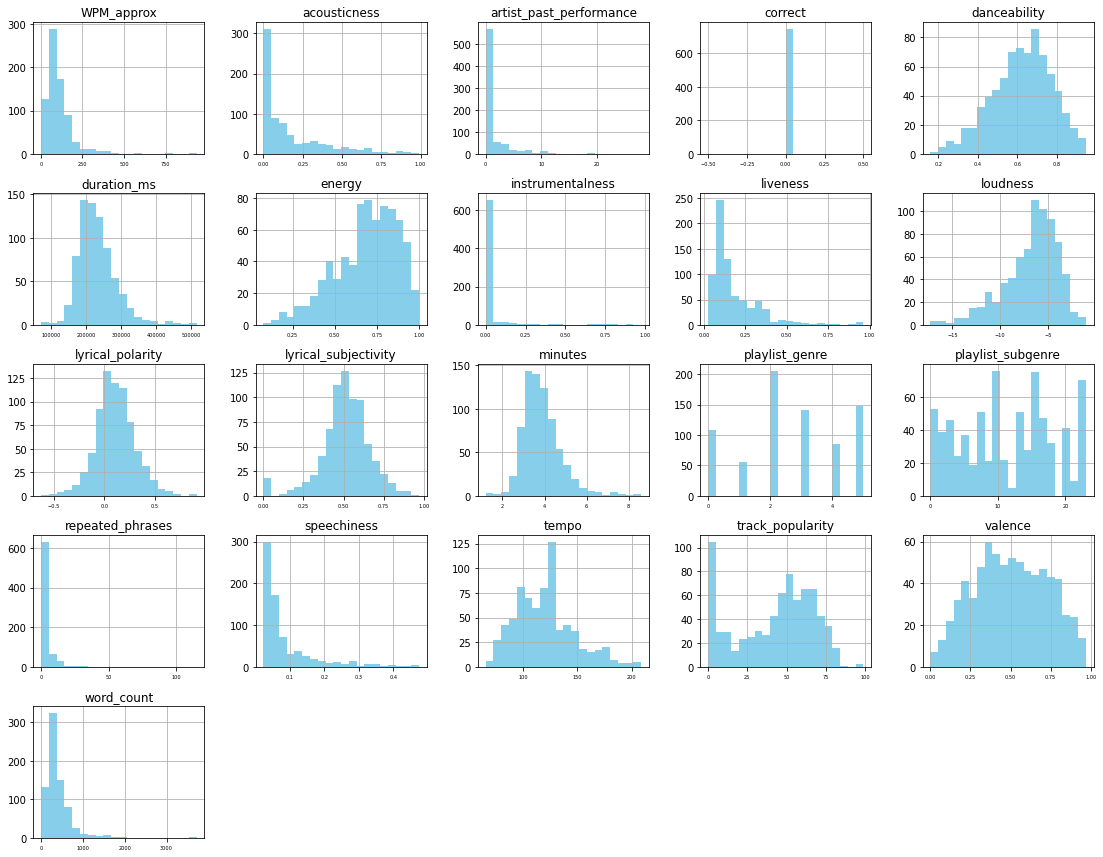

In [12]:
plt.rcParams["figure.figsize"] = [19,15]
plt.figure(figsize=(4,4))
classified.hist(xlabelsize = 5, bins = 20, color = "skyblue")